In [1]:
# mengkoneksikan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import library
import pandas as pd
import numpy as np
#from datetime import date
from IPython.display import Image
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# import dataset kedalam program python
event_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/running-example.csv', sep=';', low_memory=False)

# melakukan pemilihan column yang digunakan dan membentuk dataset baru
events = event_df[['case_id', 'activity', 'timestamp']]

# merubah nama colum yang digunakan pada dataset
events.rename(columns={'case_id':'case',
                       'activity':'activity',
                       'timestamp':'datetime'
                       }, inplace=True)

In [5]:
# merubah type data pada colum case menjadi string (object)
events['case'] = events.astype(str)

# merubah type data pada column datetime menjadi datetime
events['datetime'] = pd.to_datetime(events['datetime'])

# melihat type data pada dataset
events.dtypes

case                                      object
activity                                  object
datetime    datetime64[ns, pytz.FixedOffset(60)]
dtype: object

In [6]:
# melakukan pengecekan missing value pada dataset
events.isna().sum()

case        0
activity    0
datetime    0
dtype: int64

In [7]:
# Installasi modul PM4PY
!pip install pm4py

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 40.6 MB 73 kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23599 sha256=40cce1d128edfce6cf9d162b24938ad7e1c3bc481d67ed8378448661d442b07b
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


In [8]:
# rename field column
events.rename(columns={'datetime': 'time:timestamp', 'case': 'case:concept:name', 'activity': 'concept:name'}, inplace=True)

# define start activity label
from pm4py.algo.filtering.pandas.start_activities import start_activities_filter
log_start = start_activities_filter.get_start_activities(events)
df_start_activities = start_activities_filter.apply(events, ["register request"])

# define end activity label
from pm4py.algo.filtering.pandas.end_activities import end_activities_filter
end_activities = end_activities_filter.get_end_activities(df_start_activities)
filtered_df = end_activities_filter.apply(df_start_activities, ["pay compensation", "reject request"])

filtered_df

,case:concept:name,concept:name,time:timestamp
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00
5,3,examine thoroughly,2011-01-06 13:06:00+01:00
6,3,check ticket,2011-01-08 11:43:00+01:00
7,3,decide,2011-01-09 09:55:00+01:00
8,3,pay compensation,2011-01-15 10:45:00+01:00
9,2,register request,2010-12-30 11:32:00+01:00


In [9]:
from pm4py.objects.conversion.log import converter as log_converter

# mengkonversi dataset csv kedalam bentuk format log XES
log = log_converter.apply(filtered_df)

In [10]:
## Import heuristics miner algorithm
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

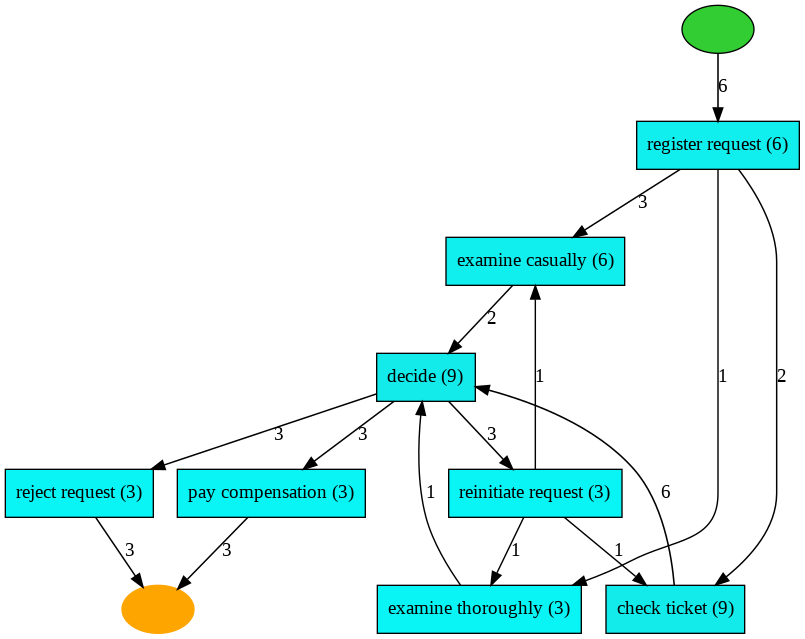

In [11]:
# Import the heuristics net visualisation object
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

# Visualise model
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

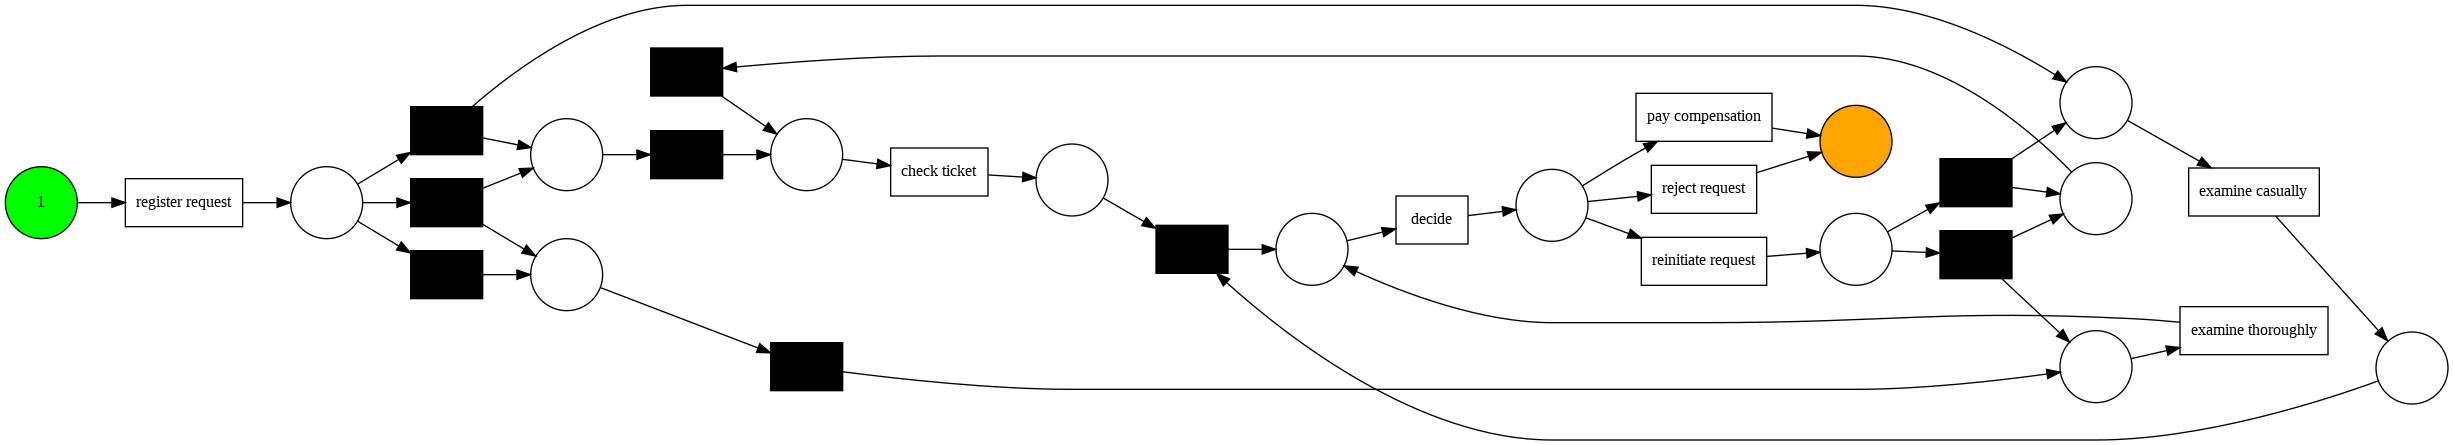

In [13]:
## visualise petri net
from pm4py.visualization.petri_net import visualizer as pn_visualizer
# heuristics miner algorithm returning model, initial marking and
# final marking
net, im, fm = heuristics_miner.apply(log)
# Petri net visualisation
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)